In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

## Import Dataset

In [2]:
airline = pd.read_csv("Tweets.csv")
airline.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
#Remove metadata columns
df = airline[["tweet_id", "airline_sentiment", "airline", "text"]]
df.head()

,tweet_id,airline_sentiment,airline,text
0,570306133677760513,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,570301130888122368,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,570301083672813571,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,570301031407624196,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,570300817074462722,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [4]:
#Label Negative, Positive and Neutral Tweets with numbers instead
for i, row in df.iterrows():
    if row.airline_sentiment == 'positive':
        df.at[i,'airline_sentiment'] = 1
    elif row.airline_sentiment== 'negative':
        df.at[i,'airline_sentiment'] = 0
    else:
        df.at[i,'airline_sentiment'] = -1
df.head()

,tweet_id,airline_sentiment,airline,text
0,570306133677760513,-1,Virgin America,@VirginAmerica What @dhepburn said.
1,570301130888122368,1,Virgin America,@VirginAmerica plus you've added commercials t...
2,570301083672813571,-1,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,570301031407624196,0,Virgin America,@VirginAmerica it's really aggressive to blast...
4,570300817074462722,0,Virgin America,@VirginAmerica and it's a really big bad thing...


In [5]:
#Remove Neutral Tweets
isneutral = df["airline_sentiment"] != -1
df = df[isneutral]

df = df.reset_index()
df.head()

,index,tweet_id,airline_sentiment,airline,text
0,1,570301130888122368,1,Virgin America,@VirginAmerica plus you've added commercials t...
1,3,570301031407624196,0,Virgin America,@VirginAmerica it's really aggressive to blast...
2,4,570300817074462722,0,Virgin America,@VirginAmerica and it's a really big bad thing...
3,5,570300767074181121,0,Virgin America,@VirginAmerica seriously would pay $30 a fligh...
4,6,570300616901320704,1,Virgin America,"@VirginAmerica yes, nearly every time I fly VX..."


## Explortary Data Analysis

In [6]:
df["airline_sentiment"].value_counts()

0    9178
1    2363
Name: airline_sentiment, dtype: int64

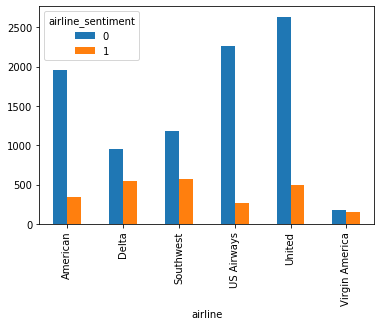

In [7]:
airline_sentiment = df.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

0 : Negative Tweets, 2 : Positive Tweets

From above, the following observations can be made: 
* There is alot more negative tweets as compared to positive tweets 
* United Airline has the most number of negative tweets. 

## Data Preprocessing

In [8]:
features = list(df['text'])
target = df['airline_sentiment']
processed_features = []

from bs4 import BeautifulSoup


for sentence in range(0, len(features)): 
    
    #remove html tags 
    processed_feature = BeautifulSoup(features[sentence], 'lxml').get_text()
    
    #remove @mentions
    processed_feature = re.sub(r'@[A-Za-z0-9]+','',processed_feature)
    
    #remove URL links 
    processed_feature = re.sub('https?://[A-Za-z0-9./]+','',processed_feature)
    
    #remove symbol #
    processed_feature = re.sub("[^a-zA-Z]", " ", processed_feature)
    
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(processed_feature))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    
    # Converting to Lowercase
    processed_feature = processed_feature.lower()
    
    #Spell correction
    processed_feature = re.sub(r'(.)\1+', r'\1\1', processed_feature)
    
    processed_features.append(processed_feature)

In [9]:
from gensim.utils import simple_preprocess
processed_features = [simple_preprocess(text, deacc= True) for text in processed_features]

import gensim
bigram = gensim.models.Phrases(processed_features)
tweets =[bigram[line] for line in processed_features]

In [10]:
tweets

[['plus',
  'you',
  've',
  'added',
  'commercials',
  'to',
  'the',
  'experience',
  'tacky'],
 ['it',
  'really',
  'aggressive',
  'to',
  'blast',
  'obnoxious',
  'entertainment',
  'in',
  'your',
  'guests',
  'faces',
  'they',
  'have',
  'little',
  'recourse'],
 ['and', 'it', 'really', 'big', 'bad', 'thing', 'about', 'it'],
 ['seriously',
  'would',
  'pay',
  'flight',
  'for',
  'seats',
  'that',
  'didn',
  'have',
  'this',
  'playing',
  'it',
  'really',
  'the',
  'only',
  'bad',
  'thing',
  'about',
  'flying',
  'va'],
 ['yes',
  'nearly',
  'every_time',
  'fly',
  'vx',
  'this',
  'ear',
  'worm',
  'won',
  'go',
  'away'],
 ['well', 'didn', 'but', 'now', 'do'],
 ['it',
  'was',
  'amazing',
  'and',
  'arrived',
  'an_hour',
  'early',
  'you_re',
  'too',
  'good',
  'to',
  'me'],
 ['pretty', 'graphics', 'so_much', 'better_than', 'minimal', 'iconography'],
 ['this',
  'is',
  'such',
  'great',
  'deal',
  'already',
  'thinking',
  'about',
  'my',
  

In [11]:
processed_features = []
for tweet in tweets: 
    processed_features.append(' '.join(tweet))
    
processed_features[:5]

['plus you ve added commercials to the experience tacky',
 'it really aggressive to blast obnoxious entertainment in your guests faces they have little recourse',
 'and it really big bad thing about it',
 'seriously would pay flight for seats that didn have this playing it really the only bad thing about flying va',
 'yes nearly every_time fly vx this ear worm won go away']

## Make Glove Embedding

In [12]:
from keras.preprocessing.text import Tokenizer
def get_coefs(word,*arr): 
    return word, np.asarray(arr, dtype='float32')

def load_embedding(file):
    if file == '../input/embeddings/wiki-news-300d-1M/wiki-news-300d-1M.vec':
        embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(file) if len(o)>100)
    else:
        embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(file, encoding='latin'))
    return embeddings_index

def make_embedding_matrix(embedding, tokenizer, len_voc):
    all_embs = np.stack(embedding.values())
    emb_mean,emb_std = all_embs.mean(), all_embs.std()
    embed_size = all_embs.shape[1]
    word_index = tokenizer.word_index
    embedding_matrix = np.random.normal(emb_mean, emb_std, (len_voc, embed_size))
    
    for word, i in word_index.items():
        if i >= len_voc:
            continue
        embedding_vector = embedding.get(word)
        if embedding_vector is not None: 
            embedding_matrix[i] = embedding_vector
    
    return embedding_matrix

def make_tokenizer(texts, len_voc):
    t = Tokenizer(num_words=len_voc)
    t.fit_on_texts(texts)
    return t

Using TensorFlow backend.


In [13]:
glove = load_embedding('glove.6B.100d.txt')

In [14]:
len_voc = 11000
tokenizer = make_tokenizer(processed_features, len_voc)
X = tokenizer.texts_to_sequences(processed_features)
X[:5]

[[520, 3, 71, 1201, 2220, 1, 2, 160, 4948],
 [11, 106, 2953, 1, 3675, 3676, 893, 10, 14, 2954, 3677, 41, 19, 444, 2221],
 [6, 11, 106, 404, 181, 445, 75, 11],
 [361,
  72,
  260,
  5,
  4,
  187,
  15,
  177,
  19,
  22,
  1999,
  11,
  106,
  2,
  105,
  181,
  445,
  75,
  132,
  1699],
 [169, 1259, 276, 40, 99, 1586, 22, 3678, 4949, 196, 131, 414]]

In [15]:
maxL =  0
for s in X:
    if len(s) > maxL:
        maxL = len(s) 
print(maxL)

29


In [16]:
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, 30)

import copy
X_original = copy.deepcopy(X)
len(X_original)

X_original[:5]


array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  520,
           3,   71, 1201, 2220,    1,    2,  160, 4948],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,   11,  106, 2953,    1, 3675, 3676,  893,
          10,   14, 2954, 3677,   41,   19,  444, 2221],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           6,   11,  106,  404,  181,  445,   75,   11],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  361,
          72,  260,    5,    4,  187,   15,  177,   19,   22, 1999,   11,
         106,    2,  105,  181,  445,   75,  132, 1699],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,  169, 1259,  276,   40,
          99, 1586,   22, 3678, 

In [17]:
# Each word has a index
index_word = {0: ''}
for word in tokenizer.word_index.keys():
    index_word[tokenizer.word_index[word]] = word

In [18]:
#Make Embedding Matrix
embed_mat = make_embedding_matrix(glove, tokenizer, len_voc)

C:\Users\Kong Yan San\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  del sys.path[0]


## Balancing the Dataset

### Upsampling the Positive

In [19]:
from sklearn.neighbors import NearestNeighbors

synonyms_number = 5
word_number = 3500

In [20]:
nn = NearestNeighbors(n_neighbors=synonyms_number+1).fit(embed_mat) 
neighbours_mat = nn.kneighbors(embed_mat[1:word_number])[1]
synonyms = {x[0]: x[1:] for x in neighbours_mat}

In [21]:
for x in np.random.randint(1, word_number, 10):
    print(f"{index_word[x]} : {[index_word[synonyms[x][i]] for i in range(synonyms_number-1)]}")

little : ['much', 'bit', 'too', 'kind']
wing : ['wings', 'front', 'right', 'left']
culture : ['cultural', 'traditions', 'history', 'context']
media : ['news', 'tv', 'television', 'public']
standby : ['contingency', 'emergency', 'loaner', 'lifeline']
bit : ['little', 'pretty', 'too', 'quite']
tag : ['tags', 'card', 'ring', 'belt']
ana : ['maria', 'santa', 'rita', 'carmen']
handlers : ['handler', 'baggage', 'skycaps', 'attendants']
harsh : ['criticism', 'brutal', 'tough', 'cruel']


In [22]:
Y = np.asarray(df.airline_sentiment)
Y_original = copy.deepcopy(Y)

In [23]:
# Filter out the positives one 
X_pos = X[Y==1]
X_pos

array([[   0,    0,    0, ...,    2,  160, 4948],
       [   0,    0,    0, ...,  196,  131,  414],
       [   0,    0,    0, ...,   25,   30,   44],
       ...,
       [   0,    0,    0, ...,   68, 1453, 2399],
       [   0,    0,    0, ...,   29,  215,    9],
       [   0,    0,    0, ...,    5,    1,  439]])

In [24]:
def modify_sentence(sentence, synonyms, p=0.5):
    for i in range(len(sentence)):
        if np.random.random() > p:
            try:
                syns = synonyms[sentence[i]]
                sentence[i] = np.random.choice(syns)
            except KeyError:
                pass
    return sentence

In [25]:
n_texts = 6815
indexes = np.random.randint(0, X_pos.shape[0], n_texts)
# add in 6815 more positive tweets
X_gen_pos = np.array([modify_sentence(x, synonyms) for x in X_pos[indexes]])
X_gen_pos

array([[   0,    0,    0, ..., 3470, 1492, 1471],
       [   0,    0,    0, ..., 2303, 7543, 2303],
       [   0,    0,    0, ...,    6, 1118,  142],
       ...,
       [   0,    0,    0, ...,  732, 2019, 2259],
       [   0,    0,    0, ...,    7,   59,  718],
       [   0,    0,    0, ...,   33,  461,  610]])

In [26]:
#Update X
X = np.concatenate((X_original, X_gen_pos), axis = 0)

#Update Y
y_gen_pos = []
for i in range(6815):
    y_gen_pos.append(1)
y_gen_pos = np.asarray(y_gen_pos)
Y = np.concatenate((Y_original,y_gen_pos), axis = 0)
Y = Y.astype('float32')

In [27]:
Y_dummy = pd.get_dummies(Y).values
Y_dummy[:5]

array([[0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1]], dtype=uint8)

In [28]:
len(X) , len(Y)

(18356, 18356)

## LSTM Model 

In [29]:
import matplotlib
matplotlib.use("TkAgg")
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Embedding
from keras.layers import SpatialDropout1D
from keras.layers import LSTM
from keras.initializers import Constant
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [31]:
"""
Hyperparameters that can be changed: 

1) epoch 
2) batch size 
3) Embedding Dimension
4) Hidden Layer 
"""

embedding_dim = 100
max_length = len(embed_mat)

model = Sequential()
model.add(Embedding(max_length, embedding_dim, input_length=X.shape[1], weights=[embed_mat]))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 128

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

C:\Users\Kong Yan San\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 13215 samples, validate on 1469 samples
Epoch 1/5
13215/13215 [==============================] - 14s 1ms/step - loss: 0.4474 - accuracy: 0.7839 - val_loss: 0.2753 - val_accuracy: 0.8904
Epoch 2/5
13215/13215 [==============================] - 13s 946us/step - loss: 0.2413 - accuracy: 0.9025 - val_loss: 0.2258 - val_accuracy: 0.9115
Epoch 3/5
13215/13215 [==============================] - 13s 956us/step - loss: 0.1750 - accuracy: 0.9308 - val_loss: 0.1844 - val_accuracy: 0.9340
Epoch 4/5
13215/13215 [==============================] - 13s 964us/step - loss: 0.1539 - accuracy: 0.9432 - val_loss: 0.1768 - val_accuracy: 0.9374
Epoch 5/5
13215/13215 [==============================] - 13s 971us/step - loss: 0.1252 - accuracy: 0.9542 - val_loss: 0.1741 - val_accuracy: 0.9442


In [32]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

3672/3672 [==============================] - 1s 362us/step
Test set
  Loss: 0.150
  Accuracy: 0.943


In [33]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

predictions = model.predict_classes(X_test)
matrix = metrics.confusion_matrix(y_true=y_test, y_pred=predictions)
print(matrix)

[[1789   73]
 [ 135 1675]]


In [34]:
def specificity(cm):
    tn = cm[0][0]
    fp = cm[0][1]
    return tn/(fp+tn)

print(specificity(matrix))

0.9607948442534908


In [37]:
model.summary(())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           1100000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,180,501
Trainable params: 1,180,501
Non-trainable params: 0
_________________________________________________________________


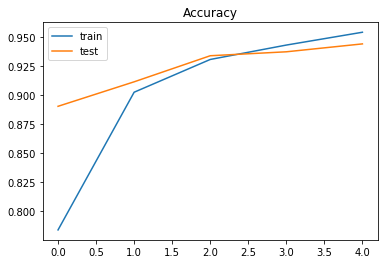

In [35]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

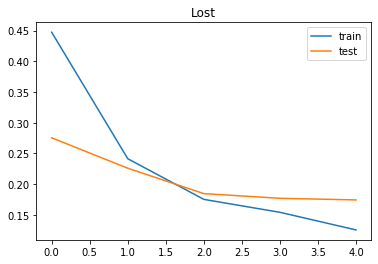

In [36]:
plt.title('Lost')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();